Pytorch 설치 및 확인



In [1]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
print(torch.__version__) # 현재 설치된 PyTorch 버전을 출력합니다.
print(torch.cuda.is_available()) # CUDA(병렬 컴퓨팅 플랫폼)가 사용 가능한지 확인하고 결과를 출력합니다.
# torch.cuda.is_available() 함수는 PyTorch에서 CUDA(Compute Unified Device Architecture)를 사용할 수 있는지를 확인하는 방법
# PyTorch와 같은 딥러닝 프레임워크에서 CUDA를 활용하면 모델 학습 및 추론 속도를 크게 향상가능
# True: CUDA가 사용 가능함. 즉, NVIDIA GPU가 설치되어 있고, 적절한 드라이버와 CUDA Toolkit이 설치되어 있습니다.
# False: CUDA가 사용 불가능함. 즉, GPU가 없거나 드라이버가 제대로 설치되지 않았습니다.

2.4.1+cpu
False


## Pytorch Tensor

pytorch의 가장 근본이 되는 Tensor들에 대해서 배워보겠습니다.

### Tensor 만드는 법


torch.tensor(data): data는 튜플, 리스트, numpy 배열 등등임.

주요 속성들
- dtype: 데이터 타입
- device: gpu에 있는지, cpu에 있는지
- requires_grad: 이게 True면 미분값을 계산함. 아니면 하지 않음.


In [27]:
# 0-D Tensor
scalar = torch.tensor(5.0)
number = torch.tensor(1.0)
print(scalar)  # tensor(5.)
print(number) # tensor(1.)

tensor(5.)
tensor(1.)


In [28]:
vector = torch.tensor([1.0, 2.0, 3.0])
tuple_vector = torch.tensor((1, 2, 3))

print(vector)  # tensor([1., 2., 3.])
print(tuple_vector) # tensor([1, 2, 3,])

tensor([1., 2., 3.])
tensor([1, 2, 3])


In [29]:
matrix = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
matrix2 = torch.tensor([[1, 2, 3], [3, 4, 5]])
print(matrix.shape)
print(matrix2.shape)
# tensor([[1., 2.],
#         [3., 4.]])

torch.Size([2, 2])
torch.Size([2, 3])


In [4]:
matrix2 = [[1, 2, 3], [3, 4, 5]]
lst = [matrix2, matrix2, matrix2, matrix2]

tensor_3d = torch.tensor([[[1.0], [2.0]], [[3.0], [4.0]]])
tensor_3d_2 = torch.tensor(lst) # len(lst), len(lst[0]), len(lst[0][0]), ....
print(tensor_3d_2.shape)

# tensor([[[1.],
#          [2.]],
#       
#         [[3.],
#          [4.]]])

torch.Size([4, 2, 3])


In [5]:
# 0-D Tensor
scalar = torch.tensor(5.0) # 0차원tensor(scalar)생성
print(scalar)  # tensor(5.)

vector = torch.tensor([1.0, 2.0, 3.0]) # 1차원tensor(vector)생성
print(vector)  # tensor([1., 2., 3.])

matrix = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print(matrix)
# tensor([[1., 2.],
#         [3., 4.]])

tensor_3d = torch.tensor([[[1.0], [2.0]], [[3.0], [4.0]]])
print(tensor_3d)
# tensor([[[1.],
#          [2.]],
#
#         [[3.],
#          [4.]]])

tensor(5.)
tensor([1., 2., 3.])
tensor([[1., 2.],
        [3., 4.]])
tensor([[[1.],
         [2.]],

        [[3.],
         [4.]]])


### torch.tensor의 주요 속성들

- tensor.shape
- tensor.size()
- tensor.dtype

In [88]:
print(vector.shape)    # torch.Size([3])
print(matrix.size())   # torch.Size([2, 2])
print(tensor_3d.shape) # torch.Size([2, 2, 1])
print(tensor_3d.dtype) # torch.float32

torch.Size([3])
torch.Size([2, 2])
torch.Size([2, 2, 1])
torch.float32


In [7]:
print(vector.dtype)    # torch.float32
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)
print(int_tensor.dtype)  # torch.int32  # in32 : 32자리 이진수공간 할당?

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor_gpu = torch.tensor([1.0, 2.0, 3.0]).to(device)
print(tensor_gpu.device)  # cuda:0 or cpu

torch.float32
torch.int32
cpu


### torch.tensor 만드는 방법

- torch.tensor(data)
- 자주 쓰는 텐서들은 만드는 함수가 있음.
  * torch.zeros(size): size 형태로 된, 0으로 된 텐서를 만듬.
  * torch.ones(size): size 형태로 된, 1로 된 텐서를 만듬.
  * torch.rand(size) / torch.randn(size) : 랜덤한 숫자로 된 텐서를 만듬. rand는 0과 1 사이에서 랜덤하게, randn은 표준정규분포(평균 0, 표준편차 1)에서 뽑아옴. # 유니폼디쓰리부션?
  * torch.eye(n): 대각선만 1이고 이외에는 0인 2D 텐서(행렬)을 만듬. # identity 매트릭스 행렬곱시 그대로 나옴 # 자연어용?
- 이외에도 많이 쓰이는 함수들
  * torch.arange: range() 함수와 매우 비슷하다.
  * torch.linspace(start, end, steps): start부터, end까지, steps개의 숫자를 가지는 텐서를 만듬. 이 때, 숫자들은 등간격으로 만들어짐.

In [8]:
list_tensor = torch.tensor([1, 2, 3])
tuple_tensor = torch.tensor((4, 5, 6))

zeros = torch.zeros((2,3))
zeros1 = torch.zeros(2,3)
zeros2 = torch.zeros(((0, 0, 0)))
zeros3 = torch.zeros((([0, 0, 0])))
zeros4 = torch.zeros((1, 2))
ones = torch.ones((2, 3))
rand = torch.rand((2, 3))
eye = torch.eye(3)  # 3x3 Identity matrix

normal = torch.randn((2, 3))  # Normal distribution
# print(normal)
arange_tensor = torch.arange(start=0, end=10, step=2) # range(0,10,2)
linspace_tensor = torch.linspace(start=0, end=1, steps=5) # 0 0.25 0.5 0.75 1

float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64)
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int32)

print(zeros.shape)
print(zeros1.shape)
print(zeros2.shape)
print(zeros3.shape)
print(zeros4.shape)
print(ones)
# print(rand)
# print(eye)
# print(arange_tensor)
# print(linspace_tensor)

torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([0, 0, 0])
torch.Size([0, 0, 0])
torch.Size([1, 2])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


TODO: 위 각 함수들을 torch.tensor와 파이썬 리스트 operation들을 이용하여 재구현해 보세요.

In [9]:
print(torch.tensor((((2,3)))))

tensor([2, 3])


In [10]:
a=((((((((((2,3))))))))))

while not isinstance(a[0],int):
    assert isinstance(a, (tuple,list)), "not a list or tuple"
    a = a[0]
print(a[0],a[1])

2 3


In [11]:
# write your code here
class pytorch():
    def nested_list(shape, value=0):
        
        while not isinstance(a[0],int):
            assert isinstance(a, (tuple,list)), "not a list or tuple"
            a = a[0]
        return 
    def random_nested_list():
        return 
    def torch_zeros(self, *arg):
        return torch.tensor()
    def torch_ones(self,):
        return torch.tensor()
    def torch_rand(self,):
        return torch.tensor()
    def torch_arange(self, end=None, start=None, step=1):
        return torch.tensor()
    def torch_lnspace(self, end=None, start=None, step=1):
        return torch.tensor()
    @staticmethod
    def torch_eye(x):
        return torch.tensor([[0 if i != j else 1 for j in range(x)] for i in range(x)])
    def __str__():
        return torch.tensor()

py = pytorch()
# py_zeros = py.torch_zeros((2,3))
# print(*py_zeros, sep='\n')
# py_ones = py.torch_ones((2,3))
# print(*py_ones, sep='\n')
# py_rand = py.torch_rand((2,3))
# print(py_rand, sep='\n')
py_eye = py.torch_eye(10)
print(py_eye)
# py_arange = py.torch_arange(start=0 ,end=10, step=2)
# print(*py_arange, sep='\n')
# py_lnspace = py.torch_lnspace(0, 1, 5)
# print(*py_lnspace, sep='\n')


tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])


In [12]:
# solution
import random

def nested_list(shape, value = 0):
    """Accepts tuple/list of int, denoting shape of the nested list.
    """
    if len(shape) == 1:
        l = shape[0]
        return [value for _ in range(l)]
    else:
        l = shape[0]
        return [nested_list(shape[1:], value = value) for _ in range(l)]

def random_nested_list(shape, sample_from, *args):
    if len(shape) == 1:
        l = shape[0]
        return [sample_from(*args) for _ in range(l)]
    else:
        l = shape[0]
        return [random_nested_list(shape[1:], sample_from, *args) for _ in range(l)]
'''
def random_nested_list(shape):
    """Accepts tuple/list of int, denoting shape of the nested list.
    """
    if len(shape) == 1:
        l = shape[0]
        return [random.random() for _ in range(l)]
    else:
        l = shape[0]
        return [random_nested_list(shape[1:]) for _ in range(l)]
'''
def randomn_nested_list(shape):
    """Accepts tuple/list of int, denoting shape of the nested list.
    """
    if len(shape) == 1:
        l = shape[0]
        return [random.gauss(0, 1) for _ in range(l)]
    else:
        l = shape[0]
        return [randomn_nested_list(shape[1:]) for _ in range(l)]

def zeros(shape):
    return torch.tensor(nested_list(shape, value = 0))
def ones(shape):
    return torch.tensor(nested_list(shape, value = 1))
def rand(shape):
    return torch.tensor(random_nested_list(shape, random.random))
def randn(shape):
    return torch.tensor(random_nested_list(shape, random.gauss, 0, 1))
def eyes(n):
    return torch.tensor([[0 if i != j else 1 for j in range(n)] for i in range(n)])

print(nested_list((2, 3, 4), value = 0))
print(zeros((2,3,4)))
print(ones((2,3,4)))
print(rand((2,3,4)))
print(randn((2,3,4)))
# print(eyes(10))

[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]]
tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])
tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])
tensor([[[0.0901, 0.5249, 0.1360, 0.2603],
         [0.2043, 0.1907, 0.7597, 0.2525],
         [0.5629, 0.7148, 0.5905, 0.9420]],

        [[0.5122, 0.8317, 0.1587, 0.1467],
         [0.9416, 0.2454, 0.1126, 0.5260],
         [0.5922, 0.5379, 0.3420, 0.3744]]])
tensor([[[-0.7688,  0.1557,  1.0339, -0.2070],
         [-0.4762, -2.2052, -0.0642,  0.1126],
         [ 1.7323,  0.3694, -0.0203,  0.3418]],

        [[ 2.1031,  2.3919,  0.2141, -0.6339],
         [-1.2586,  0.2267, -0.4772,  0.1489],
         [ 0.6219, -0.6757,  0.2023, -1.2957]]])


### torch.tensor끼리의 연산

일반적인 사칙연산, 행렬 곱(matmul), 원소간 곱 등등이 다 적용됨.  
엘레멘트 와이즈? 와이드로 하면 행렬?의 차원이 같으면 원소간 연산이 기본

In [13]:
a = torch.tensor([1.0, 2.0, 3.0]) # tensor([1., 2., 3.]) 
b = torch.tensor([4.0, 5.0, 6.0]) # tensor([4., 5., 6.])

add = a + b  # tensor([5., 7., 9.])
sub = a - b  # tensor([-3., -3., -3.])

mul = a * b  # tensor([ 4., 10., 18.])
div = b / a  # tensor([4.0000, 2.5000, 2.0000])

exp = a ** 2  # tensor([1., 4., 9.])

In [14]:
matrix_a = torch.tensor([[1, 2], [3, 4]])
matrix_b = torch.tensor([[5, 6], [7, 8]])
'''
1 2  5 6
3 4  7 8

1 3
2 4
'''
'''
1*5 + 2*7 = 19   1*6 + 2*8 = 22
3*5 + 4*7 = 43   3*6 + 4*8 = 50
'''
matmul = torch.matmul(matrix_a, matrix_b)

# tensor([[19, 22],
#         [43, 50]])

elem_mul = matrix_a * matrix_b
# tensor([[ 5, 12],
#         [21, 32]])

transposed = torch.transpose(matrix_a, 0, 1)
# tensor([[1, 3],
#         [2, 4]])

print(torch.matmul(torch.tensor([[1],[2],[3]]), torch.tensor([[4,5,6]])))
# 잡학: torch.transpose() 텐서의 차원을 바꾸는 메서드(행렬 전치)

tensor([[ 4,  5,  6],
        [ 8, 10, 12],
        [12, 15, 18]])


### Broadcasting

브로드캐스팅은 서로 다른 크기를 가진 텐서들 간에 연산을 수행할 때, 자동으로 크기를 맞춰주는 PyTorch(및 NumPy)의 기능입니다. 이 기능은 명시적으로 텐서의 크기를 변환하지 않아도, 작은 크기의 텐서를 큰 크기의 텐서와 함께 연산할 수 있도록 해줍니다. Pandas나 Numpy 등에서도 자주 활용되기 때문에 알아두면 좋습니다.

브로드캐스팅 규칙:
1. 차원의 맞추기: 두 텐서의 차원(Dimension) 수가 다를 때, 차원이 작은 텐서의 앞쪽에 1을 추가하여 차원을 맞춥니다.
2. 크기 맞추기: 각 차원에서 크기가 1인 텐서는 해당 차원의 크기를 큰 텐서의 크기에 맞춰 늘릴 수 있습니다.
3. 불가능한 경우: 두 텐서가 특정 차원에서 서로 다른 크기를 가지며, 그중 하나가 1이 아니면 브로드캐스팅이 불가능하고 오류가 발생합니다.

예를 들어서,

- (2,3) 크기의 텐서에 (3,) 크기의 텐서를 더하면, (2,3) 크기의 텐서가 됩니다. 이 때 (3,) 크기의 텐서들은 첫 번째 차원에 대해서 다 더해집니다.


In [34]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])    # Shape: (2, 3,)
b = torch.tensor([1, 2, 3])                 # Shape: (3,)
b = torch.tensor([[1, 2, 3]])               # Shape: (1, 3,)
b = torch.tensor([[1, 2, 3], [1, 2, 3]])    # Shape: (2, 3,)

broadcast_add = a + b  # Shape: (2, 3)
# tensor([[2, 4, 6],
#         [5, 7, 9]])

a = torch.tensor([[1], [2], [3]])                   # Shape: (3, 1)
b = torch.tensor([4, 5, 6])                         # Shape: (3,)
b = torch.tensor([[4, 5, 6]])                       # Shape: (1, 3,)
b = torch.tensor([[4, 5, 6], [4, 5, 6], [4, 5, 6]]) # Shape: (3, 3,)
a = torch.tensor([[1, 1, 1], [2, 2, 2], [3, 3, 3]]) # Shape: (3, 3)
a*b== [[4, 5, 6], [8, 10, 12], [12, 15, 18]]
# To make shapes compatible:
# a: (3, 1) -> (3, 3)
# b: (3,)   -> (1, 3) -> (3, 3)

broadcast_mul = a * b  # Shape: (3, 3)
# tensor([[ 4,  5,  6],
#         [ 8, 10, 12],
#         [12, 15, 18]])

### 이 외 tensor operation들

- Slicing / Indexing
- Reshaping
- Concatenation / Stacking

In [16]:
# slicing / indexing
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Basic indexing
element = tensor[1, 2]  # tensor(6)

# Slicing
sub_tensor = tensor[:, 1:]  # tensor([[2, 3],
                            #         [5, 6],
                            #         [8, 9]])

# Advanced indexing with masks
mask = tensor > 5
filtered = tensor[mask]  # tensor([6, 7, 8, 9])

In [17]:
# reshaping

tensor = torch.arange(0, 12)
reshaped_view = tensor.view(3, 4)  # tensor([[ 0,  1,  2,  3],
                                   #         [ 4,  5,  6,  7],
                                   #         [ 8,  9, 10, 11]])

reshaped_reshape = tensor.reshape(2, 6)  # tensor([[ 0,  1,  2,  3,  4,  5],
                                         #         [ 6,  7,  8,  9, 10, 11]])

# tensor.permute
tensor = torch.randn(2, 3, 4)
permuted = tensor.permute(2, 0, 1)  # Changes the order of dimensions
print(permuted.shape)  # torch.Size([4, 2, 3])


torch.Size([4, 2, 3])


In [18]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# Concatenate along existing dimension
concat = torch.cat((a, b), dim=0)  # tensor([1, 2, 3, 4, 5, 6])

# Stack along a new dimension
stack = torch.stack((a, b), dim=0)
# tensor([[1, 2, 3],
#         [4, 5, 6]])


### 수학적 함수들

- abs, sqrt, exp, log 등 unary 함수들 (텐서 하나만을 input으로 받음): torch.abs, torch.sqrt, torch.exp, torch.log
- max, min 등 binary 함수들 (텐서 2개를 input으로 받음): torch.max, torch.min
- 차원을 하나 혹은 여럿 낮추는 Reduction Operation들: torch.sum(tensor, dim = n)


In [19]:
a = torch.tensor([-1.0, -2.0, 3.0])

abs_a = torch.abs(a)               # tensor([1., 2., 3.])
# sqrt_a = torch.sqrt(a)           # tensor([   nan,    nan, 1.7321])
sqrt_a = torch.sqrt(torch.abs(a))  # tensor([1., 1.4142, 1.7321])
exp_a = torch.exp(a)               # tensor([0.3679, 0.1353, 20.0855])
log_a = torch.log(torch.abs(a))    # tensor([0.0000, 0.6931, 1.0986])

In [20]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

max_ab = torch.max(a, b)  # tensor([4., 5., 6.])
min_ab = torch.min(a, b)  # tensor([1., 2., 3.])

In [21]:
tensor = torch.tensor([[1, 2, 3], [3, 4, 5]]) # (2,3)

sum_all = torch.sum(tensor)          # tensor(10)
sum_dim0 = torch.sum(tensor, dim=0)  # tensor([4, 6, 8]) (3,)
sum_dim1 = torch.sum(tensor, dim=1)  # tensor([6, 12]) (2,)

mean_all = torch.mean(tensor.float(), dim=1)  # tensor(2.5000)
print(mean_all)

tensor([2., 4.])


In [22]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([2, 2, 2])

greater = a > b  # tensor([False, False, True])
equal = a == b   # tensor([False, True, False])

## Pytorch로 다시 해 보는 선형회귀

주어진 데이터 $(x_i, y_i)$ 에 대해서 $y=wx+b$에서, 가장 적절한 w와 b를 찾는 것이 선형회귀였음.

y = wx + b 에서, w와 b는 parameter이고 x는 입력, y는 출력임.
이 때 w랑 b를 구하기 위해서, 다음의 loss function을 최소화하는 방향으로 학습하고 싶다고 하자.

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

원래는 저 값을 그냥 바로 식으로 계산할 수 있었지만, 언제나 그렇지는 않기 때문에 (선형회귀 외의 다른 모델들에서) 수치적으로 계산해보자.




In [23]:
# 임의로 데이터를 한번 만들어 보자.
# True parameters
true_w = 2.0  # 실제 가중치
true_b = 1.0  # 실제 바이어스

# Generate data
X = torch.randn(100, 1) * 10  # 100 samples, single feature # 평균이 0이고 표준편차가 10인 정규 분포에서 샘플링
y = true_w * X + true_b + torch.randn(100, 1) * 0.2  # 노이즈를 추가하여 y 값을 생성
# w,b 2개의 파라미터 텐서 2개 생성

# y값 생성 과정
# y[0] = true_w * X[0] + true_b + torch.randn(1, 1) * 2  # 샘플*가중치 + (노이즈)
# y[1] = true_w * X[1] + true_b + torch.randn(1, 1) * 2
# ...
# y[99] = true_w * X[99] + true_b + torch.randn(1, 1) * 2

# 이 텐서가 학습 가능하게 requires_grad = True로 설정
w = torch.randn(1, 1, requires_grad=True) #  requires_grad=True, 가중치 w 무작위로 초기화, 기울기 계산할 수 있도록 설정
b = torch.randn(1, requires_grad=True) # 바이어스 b 무작위로 초기화, 기울기 계산할 수 있도록 설정

learning_rate = 0.009 # 학습률 설정 # 이걸 올리면 보폭이 커진다? 가장 적당한 값을 찾아야 한다
epochs = 5000 # 총 학습 에폭 수 설정

for epoch in range(epochs): # 학습횟수 에폭스
    # Forward pass: compute predicted y (예측된 y계산)
    # 100,1 / 1 -> 100, 1 / 1, 1 -> 100, 1 /100, 1 # 100,1 곱하기 1,1 은 shape가
    y_pred = X * w + b # y_pred: 100,1 # # 입력X * 가중치w + 바이어스b = 예측값

    # Compute and print loss # 손실계산
    loss = torch.mean((y_pred - y) ** 2) # 평균 제곱 오차(MSE) 손실을 계산 # 100, 1

    # Backward pass: compute gradients
    loss.backward() # 손실에 대한 기울기 계산

    # Update parameters using gradient descent # 경량 경량화
    with torch.no_grad(): # 기울기 업데이트 시 기울기를 추적하지 않도록 설정 기울기
        w -= learning_rate * w.grad # w 업데이트
        b -= learning_rate * b.grad # b 업데이트
    # 보법을 옵티마이저?라 한다? 잘하기 쉽지않다 가져다 쓴다?
    
    # Zero gradients after updating # 업데이트 후  w,b의 그레디언트 기울기를 0으로 초기화
    w.grad.zero_()
    b.grad.zero_()

    # 100에폭마다 현재 파라미터와 손실을 출력.
    if epoch % 200 == 0:
        print(f'Epoch {epoch}: w = {w.item():.4f}, b = {b.item():.4f}, loss = {loss.item():.4f}')
        
    # 로컬미니마이즈: 손실함수의 특정 지점, 주변보다 손실값이 낮지만, 전체 함수에서 최저점(글로벌미니마이즈)이 아닌 곳
    #   그래디언트가 로컬미니마이즈에 빠지면 더이상 파라미터를 업데이트 하지못해 최적화가 안되는 구조
    #   특히 비선형함수에서 발생 가능
    #   해결법:
    #       모멘텀(Momentum): 이전 기울기를 반영, 업데이트 방향을 조정함으로써 로컬 미니마를 피하도록 유도
    #       학습률 조정: 학습률을 조금씩 감소시키거나, 동적으로 조정하는 기법으로 최적화 성능 개선가능
    #       다양한 초기화: 파라미터를 여러 번 다른 초기값으로 초기화 하여 최적화 과정을 반복함으로 로컬미니마에 빠질 가능성을 감소

Epoch 0: w = 3.0241, b = -1.2833, loss = 409.6097
Epoch 200: w = 1.9986, b = 0.9250, loss = 0.0371
Epoch 400: w = 1.9991, b = 0.9842, loss = 0.0333
Epoch 600: w = 1.9991, b = 0.9858, loss = 0.0333
Epoch 800: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 1000: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 1200: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 1400: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 1600: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 1800: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 2000: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 2200: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 2400: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 2600: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 2800: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 3000: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 3200: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 3400: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 3600: w = 1.9991, b = 0.9859, loss = 0.0333
Epoch 3800: w = 1.9991, b = 0.9859, loss = 0.0333
Epoc

TODO: 위 선형회귀 부분을 함수로 만들고, 다양한 하이퍼파라미터 (여기서의 hyperparameter은 learning rate 뿐임)를 바꿔가며 최적의 모델을 찾아보세요.


In [46]:
# write your code here
import random

# 선형방정식 기반 데이터 생성
def generate_artificial_data(true_w, true_b, n_data, x_amplitude = 10, noise_amplitude = 0.2):
    """Generate data from y = true_w * x + true_b"""
    X = torch.randn(n_data, 1) * x_amplitude
    y = true_w * X + true_b + torch.randn(n_data, 1) * noise_amplitude # 노이즈를 주는것이 꽤 중요하고 유의미하다.

    return X, y

# 선형회귀 모델 학습
def linear_regression(data, learning_rate, epochs, quiet = False):
    X, y = data
    w = torch.randn(1, 1, requires_grad=True) # 가중치와 bias초기화
    b = torch.randn(1, requires_grad=True)

    for epoch in range(epochs):
        # 예측 값 계산
        # Forward pass: compute predicted y
        # 100, 1 / 1 -> 100, 1 / 1, 1 -> 100, 1 / 100, 1
        y_pred = X * w + b # y_pred: 100, 1

        # Compute and print loss 손실계산
        loss = torch.mean((y_pred - y) ** 2) # 100, 1

        if epoch % 100 == 0 and not quiet:
            print(f'Epoch {epoch}: w = {w.item():.4f}, b = {b.item():.4f}, loss = {loss.item():.4f}')
        # Backward pass: compute gradients # 역전파로 그래디언트 계산
        loss.backward() # 이 부분이 23일자 미분함수 오토 그래티언트라고 오토그라드? 라고 부른다?

        # Update parameters using gradient descent 경사하강법 업데이트
        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad

        # Zero gradients after updating # 그래디언트 초기화
        w.grad.zero_()
        b.grad.zero_() # gpu가 구려서 한번에 계산할 사이즈가 작으면 두번계산한걸 합치기도 한다?

    return w, b

data = generate_artificial_data(2.0, 1.0, 1000)
linear_regression(data, 0.001, 1000)
# 모델 평가
def evaluate_model(true_w, true_b, w, b):
    return (true_w - w)**2 / true_w**2 + (true_b - b)**2 / true_b**2
# 학습률에 따른 모델 성능 평가
def find_learning_rate():
    true_w = random.gauss(0, 10) # 랜덤가중치
    true_b = random.gauss(0, 10) # 랜덤bias

    data = generate_artificial_data(true_w, true_b, 1000) # data생성
    # 학습률에 대해 모델 학습 및 평가
    for learning_rate in [0.0001 * (i+1) for i in range(10)]:
        w, b = linear_regression(data, learning_rate, 1000, quiet = True) # 출력없이 조용히 학습
        score = evaluate_model(true_w, true_b, w, b) # 모델 성능 평가
        print(score, learning_rate)

find_learning_rate()


Epoch 0: w = 1.2386, b = -0.8803, loss = 60.8750
Epoch 100: w = 2.0008, b = -0.5366, loss = 2.4325
Epoch 200: w = 2.0005, b = -0.2561, loss = 1.6437
Epoch 300: w = 2.0002, b = -0.0264, loss = 1.1151
Epoch 400: w = 1.9999, b = 0.1616, loss = 0.7609
Epoch 500: w = 1.9997, b = 0.3155, loss = 0.5235
Epoch 600: w = 1.9996, b = 0.4414, loss = 0.3645
Epoch 700: w = 1.9994, b = 0.5445, loss = 0.2579
Epoch 800: w = 1.9993, b = 0.6289, loss = 0.1865
Epoch 900: w = 1.9992, b = 0.6980, loss = 0.1386
tensor([[0.5185]], grad_fn=<AddBackward0>) 0.0001
tensor([[0.4871]], grad_fn=<AddBackward0>) 0.0002
tensor([[0.2798]], grad_fn=<AddBackward0>) 0.00030000000000000003
tensor([[0.2103]], grad_fn=<AddBackward0>) 0.0004
tensor([[0.1933]], grad_fn=<AddBackward0>) 0.0005
tensor([[0.0877]], grad_fn=<AddBackward0>) 0.0006000000000000001
tensor([[0.0644]], grad_fn=<AddBackward0>) 0.0007
tensor([[0.0386]], grad_fn=<AddBackward0>) 0.0008
tensor([[0.0242]], grad_fn=<AddBackward0>) 0.0009000000000000001
tensor([[0.

### 선형회귀 조금 더 해보기


TODO: 이번에는 비슷하게, 입력이 3개이고 출력이 1개인 선형회귀를 해 보자.

$y = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$

In [87]:
# y = w1*x1 + w2 * x2 + w3 * x3 + b
import random

# 3개의 입력을 사용하는 데이터 생성 함수
def generate_artificial_3data(true_w, true_b, n_data, x_amplitude=10, noise_amplitude=0.2):
    """Generate data from y = w1*x1 + w2*x2 + w3*x3 + b 형태의 데이터를 생성"""
    X = torch.randn(n_data, 3) * x_amplitude  # x1, x2, x3 3개의 입력 데이터 생성
    y = (true_w[0]*X[0] + true_w[1]*X[1] + true_w[2]*X[2] + true_b + torch.randn(n_data,1) * noise_amplitude)
    return X, y

# 입력이 3개
def linear_regression_3(data, learning_rate, epochs, quiet=False):
    X, y = data
    w = torch.randn(3, 1, requires_grad=True)  # 3개의 가중치 w1, w2, w3
    b = torch.randn(1, requires_grad=True) # bias는 1개

    for epoch in range(epochs):
        # 예측 값 계산
        y_pred = X @ w + b
        # 손실(Mean Squared Error) 계산
        loss = torch.mean((y_pred - y) ** 2)
        if epoch % 100 == 0 and not quiet:
            print(f'Epoch {epoch}: w = {[w[i].item() for i in range(3)]}, b = {b.item():.4f}, loss = {loss.item():.4f}')
        # 역전파로 그래디언트 계산
        loss.backward()
        # 경사 하강법으로 w,b 업데이트
        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad
        # 그래디언트 초기화
        w.grad.zero_()
        b.grad.zero_()
        
    return w, b

# 모델 평가 함수
def evaluate_model(true_w, true_b, w, b):
    w_difference = sum([(true_w[i] - w[i])**2 / true_w[i]**2 for i in range(3)])
    b_difference = (true_b - b)**2 / true_b**2
    return w_difference + b_difference

# 실제 weight와 bias를 랜덤생성 : 다양한 학습률에 따른 모델 성능 평가
def find_learning_rate(): # weight bias 랜덤설정
    true_w = [random.gauss(0, 10) for _ in range(3)]
    true_b = random.gauss(0, 10)
    data = generate_artificial_3data(true_w, true_b, 1000)  # data 생성

    # 여러 학습률에 대해 모델 학습 및 평가
    for learning_rate in [0.0001 * (i+1) for i in range(10)]:
        w, b = linear_regression_3(data, learning_rate, 1000, quiet=True)  # 출력없이 조용히 학습
        score = evaluate_model(true_w, true_b, w, b)  # 모델 성능 평가
        print(f'학습률: {learning_rate:.5f}, 평가 점수: {score.item()}')

# 하이퍼파라미터 탐색 실행
find_learning_rate()


학습률: 0.00010, 평가 점수: 3.183952808380127
학습률: 0.00020, 평가 점수: 3.0345678329467773
학습률: 0.00030, 평가 점수: 3.404149055480957
학습률: 0.00040, 평가 점수: 4.232607364654541
학습률: 0.00050, 평가 점수: 5.055530548095703
학습률: 0.00060, 평가 점수: 5.471670150756836
학습률: 0.00070, 평가 점수: 6.4686079025268555
학습률: 0.00080, 평가 점수: 7.016118049621582
학습률: 0.00090, 평가 점수: 7.4794745445251465
학습률: 0.00100, 평가 점수: 8.144976615905762


### 뒤에서 할 내용 미리 살짝 엿보기 - Optimizer


In [ ]:
# 이번에는 adam optimizer를 한번 사용해보자.
import torch
import math

# 임의로 데이터를 한번 만들어 보자.
# True parameters
true_w = 2.0
true_b = 1.0

# Generate data
X = torch.randn(100, 1) * 10  # 100 samples, single feature
y = true_w * X + true_b + torch.randn(100, 1) * 2  # Add noise

# requires_grad = True로 해야 학습이 가능
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 아담 옵티마이저 하이퍼파라미터 설정
learning_rate = 0.005
epochs = 10000
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# 아담 옵티마이저를 위한 모멘트 변수 초기화
m_w = torch.zeros_like(w)
v_w = torch.zeros_like(w)
m_b = torch.zeros_like(b)
v_b = torch.zeros_like(b)

# 아담 옵티마이저를 위한 시간 스텝 변수 초기화
t = 0

for epoch in range(1, epochs + 1):
    # Forward pass: compute predicted y
    y_pred = X * w + b

    # Compute and print loss
    loss = torch.mean((y_pred - y) ** 2)

    # Backward pass: compute gradients
    loss.backward()

    # 아담 옵티마이저 업데이트
    with torch.no_grad():
        t += 1  # 시간 스텝 증가

        # w 파라미터 업데이트
        m_w = beta1 * m_w + (1 - beta1) * w.grad
        v_w = beta2 * v_w + (1 - beta2) * (w.grad ** 2)
        # 편향 보정
        m_w_hat = m_w / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        # 파라미터 업데이트
        w -= learning_rate * m_w_hat / (torch.sqrt(v_w_hat) + epsilon)

        # b 파라미터 업데이트
        m_b = beta1 * m_b + (1 - beta1) * b.grad
        v_b = beta2 * v_b + (1 - beta2) * (b.grad ** 2)
        # 편향 보정
        m_b_hat = m_b / (1 - beta1 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)
        # 파라미터 업데이트
        b -= learning_rate * m_b_hat / (torch.sqrt(v_b_hat) + epsilon)

    # Gradients 초기화
    w.grad.zero_()
    b.grad.zero_()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: w = {w.item():.4f}, b = {b.item():.4f}, loss = {loss.item():.4f}')


자꾸 local minima 어딘가에 빠지는 것 같다. 이걸 수정하기 위해서, 일정 횟수 이상 바뀌지 않으면 noise를 주는 방식을 생각해보자.


In [ ]:
import torch
import math

# 임의로 데이터를 한번 만들어 보자.
# True parameters
true_w = 2.0
true_b = 1.0

# Generate data
torch.manual_seed(42)  # 재현성을 위해 시드 설정
X = torch.randn(100, 1) * 10  # 100 samples, single feature
y = true_w * X + true_b + torch.randn(100, 1) * 2  # Add noise

# requires_grad = True로 해야 학습이 가능
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 아담 옵티마이저 하이퍼파라미터 설정
learning_rate = 0.005
epochs = 10000
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# 아담 옵티마이저를 위한 모멘트 변수 초기화
m_w = torch.zeros_like(w)
v_w = torch.zeros_like(w)
m_b = torch.zeros_like(b)
v_b = torch.zeros_like(b)

# 아담 옵티마이저를 위한 시간 스텝 변수 초기화
t = 0


patience = 300  # 손실과 파라미터 변화가 임계값 이하로 유지되는 에포크 수
threshold_loss = 1e-4  # 손실 변화 임계값
threshold_w = 1e-4     # w 변화 임계값
threshold_b = 1e-4     # b 변화 임계값


loss_history = []
w_history = []
b_history = []

for epoch in range(1, epochs + 1):
    # Forward pass: compute predicted y
    y_pred = X * w + b

    # Compute and print loss
    loss = torch.mean((y_pred - y) ** 2)

    # Backward pass: compute gradients
    loss.backward()

    # 아담 옵티마이저 업데이트
    with torch.no_grad():
        t += 1  # 시간 스텝 증가

        # w 파라미터 업데이트
        m_w = beta1 * m_w + (1 - beta1) * w.grad
        v_w = beta2 * v_w + (1 - beta2) * (w.grad ** 2)
        # 편향 보정
        m_w_hat = m_w / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        # 파라미터 업데이트
        w -= learning_rate * m_w_hat / (torch.sqrt(v_w_hat) + epsilon)

        # b 파라미터 업데이트
        m_b = beta1 * m_b + (1 - beta1) * b.grad
        v_b = beta2 * v_b + (1 - beta2) * (b.grad ** 2)
        # 편향 보정
        m_b_hat = m_b / (1 - beta1 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)
        # 파라미터 업데이트
        b -= learning_rate * m_b_hat / (torch.sqrt(v_b_hat) + epsilon)

    # Gradients 초기화
    w.grad.zero_()
    b.grad.zero_()

    # 손실과 파라미터 값을 기록
    loss_history.append(loss.item())
    w_history.append(w.item())
    b_history.append(b.item())

    # Patience에 도달했는지 확인
    if epoch >= patience :
        # 최근 'patience' 에포크의 손실 변화 계산
        recent_losses = loss_history[-patience:]
        loss_deltas = [abs(recent_losses[i] - recent_losses[i-1]) for i in range(1, patience)]
        max_loss_delta = max(loss_deltas)

        # 최근 'patience' 에포크의 w 변화 계산
        recent_ws = w_history[-patience:]
        w_deltas = [abs(recent_ws[i] - recent_ws[i-1]) for i in range(1, patience)]
        max_w_delta = max(w_deltas)

        # 최근 'patience' 에포크의 b 변화 계산
        recent_bs = b_history[-patience:]
        b_deltas = [abs(recent_bs[i] - recent_bs[i-1]) for i in range(1, patience)]
        max_b_delta = max(b_deltas)

        # 변화가 모두 임계값 이하인 경우 노이즈 추가
        if (max_loss_delta < threshold_loss) and (max_w_delta < threshold_w) and (max_b_delta < threshold_b):
            print(f'\nEpoch {epoch}: No significant updates in the last {patience} epochs. Adding noise to parameters.')
            # 파라미터에 노이즈 추가
            noise_w = torch.randn_like(w) * 0.1
            noise_b = torch.randn_like(b) * 0.1
            w.data += noise_w
            b.data += noise_b

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: w = {w.item():.4f}, b = {b.item():.4f}, loss = {loss.item():.4f}')

# 최종 파라미터 출력
print(f'\nFinal Parameters: w = {w.item():.4f}, b = {b.item():.4f}, loss = {loss.item():.4f}')

## 딥러닝 들어가기


아래 코드는 pytorch 에서 딥러닝 모델을 짤 때, 가장 일반적인 형식이라고 할 수 있다. 각 부분에서 쓰일 함수들은 문제에 따라서 다르지만, 대개의 경우 위 내용이 크게 바뀌지 않을 것임.

In [1]:
import torch  # 파이토치(Torch) 라이브러리: 딥러닝 및 텐서 연산을 위한 프레임워크
import torch.nn as nn  # 신경망 모듈(nn.Module)을 정의하고 사용하는 모듈
import torch.optim as optim  # 옵티마이저(Optimizer) 모듈: 모델의 가중치를 업데이트하는 방법을 제공
from torch.utils.data import DataLoader, TensorDataset  # DataLoader: 데이터를 배치로 묶어주는 유틸리티, TensorDataset: 텐서 데이터를 다루기 쉽게 하는 클래스
import torch.nn.functional as F  # 활성화 함수(ReLU, Softmax 등) 및 손실 함수 등 다양한 함수들 제공
import numpy as np  # 넘파이(Numpy): 수치 연산을 위한 라이브러리, 텐서 데이터 관리 및 수학적 연산에 사용

# Seed for reproducibility # 결과 재현성을 위해 시드 설정
torch.manual_seed(0)  # 파이토치에서 시드(seed)를 설정하여 같은 결과가 나오도록 함 (랜덤 연산 고정)
# 파이토치에서 무작위 연산(랜덤 값 생성, 가중치 초기화 등)의 결과를 고정하여 같은 결과가 나오도록 설정하는 함수. 이를 통해 실험을 재현
np.random.seed(0)  # 넘파이에서 시드(seed)를 설정하여 같은 결과가 나오도록 함 (랜덤 연산 고정)
# 넘파이에서 무작위 연산의 결과를 고정하는 역할

원래대로라면 실제 데이터를 쓰는 것이 좋지만, 실험의 편리함을 위해 인공적으로 만든 합성 데이터를 사용하자.

입력 feature는 20개다. 1시간 후에 비가 올지 안 올지 알고 싶은데, 현재 가지고 있는 데이터가 서울 각지의 습도 데이터라고 하자. 20곳에서 동시에 각각 습도를 잰 것이다. 이 데이터를 가지고 비가 오면 1, 비가 오지 않으면 0이라고 하자. 실제 데이터를 안 가지고 있기 때문에, 적당히 수식을 써서 비가 오는 경우와 안 오는 경우를 임의로 구분하여 합성 데이터를 만들자. 이러한 데이터 포인트 1000개를 만들자.

In [ ]:
import numpy as np
import torch

# Generate synthetic data
num_samples = 1000
input_features = 20

# Features: random numbers
X = np.random.randn(num_samples, input_features).astype(np.float32)

# Labels: sum of features > 0 => class 1, else class 0
# Please convince yourself this is the real data, while actuall not the case
y = (X.sum(axis=1) > 0).astype(np.float32)

# Convert to PyTorch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y).unsqueeze(1)  # Add dimension for compatibility

$x_0 + x_1 + ... + x_{19} >0 $

$$x_0 \cdot w_0 + \cdots + x_{19} \cdot w_{19} + b$$

비가 오는지 오지 않는지 어떻게 추정할 수 있을까? 위 수식을 계산하여 결정한다. 비가 오면 값이 커지고, 비가 오지 않으면 값이 작아지도록 한다. 0을 기준으로 양수이면 비가 오는 것으로 판단, 음수면 비가 오지 않는 것으로 판단한다.

`X`는 주어진 데이터이니, 우리는 원하는 값을 계산할 수 있도록 해 주는 `w`와 `b`의 값을 구하면 된다.

일단 랜덤으로 값을 초기화해 놓고, 이후 경사하강법으로 좋은 값을 찾아간다.

In [ ]:
w = torch.randn(input_features, requires_grad=True)
b = torch.randn(1, requires_grad=True)

본격적으로 답을 찾기 전에, 랜덤으로 만든 값들이 얼마나 유용한지 테스트해보자.

혹시라도 랜덤으로 만들었는데 이미 잘 맞춘다면 우리가 이 고생을 할 필요가 없다.

In [ ]:
cnt_total = 0
cnt_correct = 0
for x_i, y_i in zip(X_tensor, y_tensor):
    with torch.no_grad():
        score = torch.sum(x_i*w) + b
    predict_flag = score > 0
    answer_flag = y_i == 1

    if predict_flag == answer_flag:
        cnt_correct += 1
    cnt_total += 1

print(f'Accuracy: {cnt_correct/cnt_total}')

다음은 놀랍게도 실제 뉴럴네트워크의 학습 과정이다.
```
면접관: 당신의 장점은?
나: 저는 머신러닝 전문가입니다.
면접관: 9+10은?
나: 3 입니다.
면접관: 틀렸네. 전혀 달라. 답은 19일세.
나: 16 입니다.
면접관: 틀렸네. 답은 19일세.
나: 18 입니다.
면접관: 틀렸네. 답은 19일세.
나: 19 입니다.
면접관: 자넨 합격일세.
```

다만 아래와 같이 좀 더 정확하게 고칠 수 있다.

```
훈련교관: 현재 서울 곳곳의 습도는 이러하다. 1시간 후에 비가 오겠는가?
신경망: 수식을 계산한 결과 8이 나왔습니다. 0보다 크니 비가 올 것입니다.
훈련교관: 답은 비가 오지 않는다네.
신경망: 명심하겠습니다.

훈련교관: 현재 서울 곳곳의 습도는 이러하다. 1시간 후에 비가 오겠는가?
신경망: 수식을 계산한 결과 3이 나왔습니다. 0보다 크니 비가 올 것입니다.
훈련교관: 답은 비가 온다네.
신경망: 명심하겠습니다.

훈련교관: 현재 서울 곳곳의 습도는 이러하다. 1시간 후에 비가 오겠는가? (1. 학습 데이터 샘플링)
신경망: 수식을 계산한 결과 -10이 나왔습니다. 0보다 작으니 비가 안 올 것입니다. (2. 추론)
훈련교관: 답은 비가 오지 않는다네.
신경망: 명심하겠습니다. (3. 손실함수에서 역전파된 그래디언트를 바탕으로 파라미터 조정)
```
위에서 이미 1단계와 2단계를 끝냈다.
이제 위 코드에 약간 추가해 3단계를 수행하자.

손실함수를 계산하기 이전에 손실함수에 대해 짚고 넘어가는 것이 좋겠다. `torch.nn.BCEWithLogitsLoss()`가 우리가 사용할 손실함수다. 이 함수의 수학적 구조에 대해 논하는 것은 이론 시간의 역할이고, 실습 시간에는 이 손실함수가 우리가 원하는 성질을 만족시키는지만 간단히 체크하고 넘어가자.

손실함수는 말 그대로의 의미를 지닌다. 손실이다. 크면 안 된다. 우리는 손실을 줄여야 한다. 좀 더 정확히는, 절대적인 크기보다는 상대적인 크기가 중요하다.

신경망은 학습을 통해 나쁜 상태에서 좋은 상태로 나아간다. 나쁜 상태는 비가 오는지 오지 않는지 잘 예측하지 못하는 상태이고, 좋은 상태는 그 반대다. 현재 신경망이 처한 상태가 얼마나 좋은지, 또는 얼마나 나쁜지 알려주는 가이드가 손실함수다.

우리에게 $s_1$과 $s_2$라는 두 가지의 상태가 있고, $s_1$이 더 바람직한 상태라고 하자. 손실함수를 $f$라고 하면, 다음을 만족해야 한다.

$$f(s_1) < f(s_2)$$

(상태란 단적으로 말하면 `w`와 `b`의 값을 말한다.)

$$x_0 \cdot w_0 + \cdots + x_{19} \cdot w_{19} + b$$

A. 만약 신경망이 수식을 계산한 결과가 10이고, 이 때 비가 온다면 현재 신경망은 좋은 상태에 있는 것이다.

B. 만약 신경망이 수식을 계산한 결과가 10이고, 이 때 비가 오지 않는다면 현재 신경망은 나쁜 상태에 있는 것이다.

C. 만약 신경망이 수식을 계산한 결과가 -6이고, 이 때 비가 온다면 현재 신경망은 나쁜 상태에 있는 것이다.

D. 만약 신경망이 수식을 계산한 결과가 -6이고, 이 때 비가 오지 않는다면 현재 신경망은 좋은 상태에 있는 것이다.


In [ ]:
criterion = torch.nn.BCEWithLogitsLoss()

# 비가 오면 1, 안 오면 0

# A
a = criterion(torch.tensor([10.]), torch.tensor([1.]))
print(a)

# B
b = criterion(torch.tensor([10.]), torch.tensor([0.]))
print(b)

# C
c = criterion(torch.tensor([-6.]), torch.tensor([1.]))
print(c)

# D
d = criterion(torch.tensor([-6.]), torch.tensor([0.]))
print(d)

assert a < b
assert a < c
assert d < b
assert d < c

손실함수가 원하는 성질을 가진다는 것을 확인했으니 이제 신경망의 학습과정을 구현하자. 학습이 진행되며 손실함수가 점점 줄어들어야 정상이다.

In [ ]:
num_epoch = 300
learning_rate = 0.003

w.grad = torch.zeros_like(w) # Initialize gradient
b.grad = torch.zeros_like(b) # Initialize gradient

for epoch in range(num_epoch):
    loss_sum = 0
    for x_i, y_i in zip(X_tensor, y_tensor):
        # Evaluation code is commented out because not needed
        # predict_flag = (x_i*w).sum() + b > 0
        # answer_flag = y_i == 1

        w.grad.zero_() # Clear gradient
        b.grad.zero_() # Clear gradient

        # score = x_1 * w_1 + x_2 * w_2 + ... + x_19 * w_19 + b
        score = torch.sum(x_i*w) + b
        loss = criterion(score.squeeze(), y_i.squeeze())
        loss.backward()
        loss_sum += loss.item()

        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad

    print(f'Epoch {epoch+1}/{num_epoch}, Loss: {loss_sum/num_samples}')

학습이 어느정도 진행되었으면 정확도를 다시 확인해보자.

In [ ]:
cnt_total = 0
cnt_correct = 0
for x_i, y_i in zip(X_tensor, y_tensor):
    with torch.no_grad():
        score = torch.sum(x_i*w) + b
    predict_flag = score > 0
    answer_flag = y_i == 1

    if predict_flag == answer_flag:
        cnt_correct += 1
    cnt_total += 1

print(f'Accuracy: {cnt_correct/cnt_total}')

아래는 같은 문제를 다층 퍼셉트론, `torch.nn.Module`, `torch.optim` 등을 통해 해결한 것이다.\
위는 원리를 설명하기 위한 실습이고, 현업에서는 아래와 같은 코드를 작성하는 것이 좋다.

In [ ]:
class SimpleMLP(nn.Module): # Multi-Layer Perceptron(Multi-Layer Neural Network) 클래스 정의
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        # Define layers # 모델의 레이어(층) 정의
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer # 첫 번째 완전연결층 레이어 정의 (입력 크기 -> 은닉층 크기)
        self.relu = nn.ReLU()             # ReLU activation 활성화 함수 정의 (비선형 변환)
        self.fc2 = nn.Linear(hidden_size, output_size) # Second fully connected layer # 두 번째 완전연결층 레이어 정의 (은닉층 크기 -> 출력 크기)

    def forward(self, x): # 데이터를 받아서 순전파(forward pass)를 수행하는 함수
        out = self.fc1(x)      # Input to first layer # 첫 번째 레이어에 입력값을 전달
        out = self.relu(out)   # Apply ReLU 활성화 함수 적용
        out = self.fc2(out)    # Output layer # 두 번째 레이어에 출력값 전달
        return out             # 최종 출력값 반환


# Create a dataset and data loader # 데이터셋과 데이터로더 생성
dataset = TensorDataset(X_tensor, y_tensor) # 입력 데이터(X_tensor)와 정답 데이터(y_tensor)로 텐서 데이터셋 생성
batch_size = 32 # 한 번에 모델에 넣는 데이터 묶음 크기 (미니배치)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True) # 배치로 데이터를 묶어서 모델에 전달할 수 있도록 데이터로더 생성, 셔플을 통해 데이터 순서를 무작위로 섞음

# dataloader = create_dataset()

# Hyperparameters
input_size = input_features # 입력 크기 (특징 개수)
hidden_size = 64 # 은닉층 크기
output_size = 1  # Binary classification # 출력 크기 (이진 분류이므로 1개의 출력)

# Instantiate the model # 모델 생성
model = SimpleMLP(input_size, hidden_size, output_size) # 정의한 모델 인스턴스화

# Loss function and optimizer # 손실함수, 옵티마이저 설정
criterion = nn.BCEWithLogitsLoss()  # Combines a sigmoid layer and the BCELoss # Binary Cross Entropy와 로짓 결합한 손실 함수 (출력값에 시그모이드를 결합하여 이진 분류)
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam 옵티마이저 사용, 학습률은 0.001 (모델의 가중치를 업데이트하는 역할)
# 그래티언트 디센트 자체를 해주는걸 옵티마이저라 한다.
# Training parameters
num_epochs = 20 # 학습할 에폭(epoch) 수 (데이터셋을 몇 번 반복 학습할지)

# Training loop
for epoch in range(num_epochs): # epoch학습횟수 실행
    for batch_X, batch_y in dataloader: # 데이터로더에서 미니배치를 하나씩 꺼내서 학습
        # 순전파(Forward pass)
        outputs = model(batch_X) # 모델에 입력값을 넣어서 예측값(outputs)을 얻음
        loss = criterion(outputs, batch_y) # 예측값과 실제 정답(batch_y)을 비교하여 손실 계산

        # Backward pass and optimization # 역전파 및 옵티마이저
        optimizer.zero_grad()  # Clear gradients # 역전파를 하기 전에 기존의 기울기(gradient) 값을 초기화
        loss.backward()        # Compute gradients # 역전파를 통해 기울기 계산
        optimizer.step()       # Update weights # 옵티마이저가 기울기를 사용해 가중치 업데이트

    # Print loss for every epoch # 각 에폭마다 손실 출력
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}') # 손실값을 출력하여 학습 진행 상황 확인

# train()

# Evaluation
model.eval() # 모델을 평가 모드로 전환 (dropout과 같은 학습 중에만 사용하는 기능을 비활성화)

with torch.no_grad(): # 평가할 때는 기울기를 계산하지 않음
    outputs = model(X_tensor) # 전체 데이터를 모델에 넣어서 예측값 얻음
    predictions = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities # 출력값에 시그모이드 함수 적용해서 확률로 변환
    predicted_classes = (predictions >= 0.5).float() # 확률이 0.5 이상이면 클래스 1, 그렇지 않으면 0으로 분류

    # Calculate accuracy # 정확도 계산
    accuracy = (predicted_classes == y_tensor).float().mean() # 예측값과 실제값을 비교하여 정확도 계산
    print(f'Accuracy: {accuracy * 100:.2f}%') # 정확도를 퍼센트로 출력

In [ ]:
# 사라진 셀 # Generate synthetic data
num_samples = 1000
input_features = 20

# Features: random numbers
X = np.random.randn(num_samples, input_features).astype(np.float32)

# Labels: sum of features > 0 => class 1, else class 0
y = (X.sum(axis=1) > 0).astype(np.float32)

# Convert to PyTorch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y).unsqueeze(1)  # Add dimension for compatibility

# Create a dataset and data loader
dataset = TensorDataset(X_tensor, y_tensor)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np

class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleMLP, self).__init__()
        # Define layers
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()             # ReLU activation
        self.fc2 = nn.Linear(hidden_size, 1) # Second fully connected layer

    def forward(self, x):
        out = self.fc1(x)      # Input to first layer
        out = self.relu(out)   # Apply ReLU
        out = self.fc2(out)    # Output layer
        return out

    def create_dataset(self, num_samples = 1000, batch_size = 32):
        # Features: random numbers
        input_features = self.input_size
        X = np.random.randn(num_samples, input_features).astype(np.float32)

        # Labels: sum of features > 0 => class 1, else class 0
        # Please convince yourself this is the real data, while actuall not the case
        y = (X.sum(axis=1) > 0).astype(np.float32)

        # Convert to PyTorch tensors
        X_tensor = torch.from_numpy(X)
        y_tensor = torch.from_numpy(y).unsqueeze(1)  # Add dimension for compatibility

        dataset = TensorDataset(X_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        return dataloader

    def train(self, train_data, num_epochs = 20, learning_rate = 0.001, criterion = nn.BCEWithLogitsLoss):
        criterion = criterion()  # Combines a sigmoid layer and the BCELoss
        optimizer = optim.Adam(self.parameters(), lr = learning_rate)

        # Training loop
        for epoch in range(num_epochs):
            for batch_X, batch_y in train_data:
                # Forward pass
                outputs = self(batch_X)
                loss = criterion(outputs, batch_y)

                # Backward pass and optimization
                optimizer.zero_grad()  # Clear gradients
                loss.backward()        # Compute gradients
                optimizer.step()       # Update weights

            # Print loss for every epoch
            # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

        return model

    def evaluate(self, test_data):
        # self.eval()
        with torch.no_grad():
            accuracy_history = []
            for batch_X, batch_y in test_data:
                outputs = self(batch_X)
                predictions = torch.sigmoid(outputs)
                predicted_classes = (predictions >= 0.5).float()
                accuracy = (predicted_classes == batch_y).float().mean()
                accuracy_history.append(accuracy)
            accuracy = sum(accuracy_history) / len(accuracy_history)
            print(f'Accuracy: {accuracy * 100:.2f}%')
            return accuracy

model = SimpleMLP(20, 64)
train_dataset = model.create_dataset()
test_dataset = model.create_dataset()
print(train_dataset)
model.train(train_dataset)
model.evaluate(test_dataset)

Accuracy: 97.36%


tensor(0.9736)

TODO: input_size, hidden_size, learning_rate 등의 하이퍼파라미터를 바꿔 가며 최적의 모델을 찾아보세요.

In [23]:
def hidden_size_candidates():
    return [2**n for n in range(7)]

def learning_rate_candidates():
    return [0.001]

def train_and_eval(hidden_size, learning_rate):
    model = SimpleMLP(20, hidden_size)
    train_dataset = model.create_dataset(1000)
    test_dataset = model.create_dataset(100)

    model.train(train_dataset, learning_rate = learning_rate)
    evaluation_result = model.evaluate(test_dataset)

    return evaluation_result

def find_hyperparameter():
    hidden_sizes = hidden_size_candidates()
    learning_rates = learning_rate_candidates()
    result_history = []
    for hidden_size in hidden_sizes:
        for learning_rate in learning_rates:
            eval_result = train_and_eval(hidden_size, learning_rate)
            result_history.append((hidden_size, learning_rate, eval_result))
            print(hidden_size, learning_rate, eval_result)
    return max(result_history, key = lambda x:x[2])

find_hyperparameter()


Accuracy: 92.97%
1 0.001 tensor(0.9297)
Accuracy: 95.31%
2 0.001 tensor(0.9531)
Accuracy: 96.09%
4 0.001 tensor(0.9609)
Accuracy: 90.62%
8 0.001 tensor(0.9062)
Accuracy: 96.88%
16 0.001 tensor(0.9688)
Accuracy: 93.75%
32 0.001 tensor(0.9375)
Accuracy: 98.44%
64 0.001 tensor(0.9844)


(64, 0.001, tensor(0.9844))

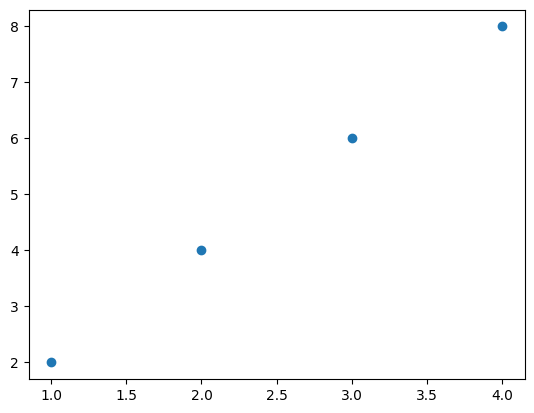

In [24]:
# write your code here
# 함수 생성

import matplotlib.pyplot as plt

X = [1,2,3,4]
y = [2,4,6,8]
plt.scatter(X, y)
plt.show()

딥러닝으로

1) 선형회귀 y = 4 + 3x 를 해볼 것
2)

1.   선형 회귀 y = 4 + 3x를 해볼 것
  - 맨 처음에는 torch.tensor이용해서 아예 바닥부터 구현
  - 그 이후에 nn.Linear 써서 구현
  - 그 이후에 dataloader 써서 구현
  - batching 구현해보기
  - optimizer 써보기

2. 다 하고 나서 $ y = w_1 x_1  + w_2 x_2  + w_3 x_3 + b$  해볼 것

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_synthetic_data(n_samples = 1000, x_amplitude = 10, noise_amplitude = 1):
    X = torch.randn(n_samples, 1) * x_amplitude
    noise = torch.randn(n_samples, 1) * noise_amplitude

    y = 4 + 3 * X + noise
    return X, y

X, y = generate_synthetic_data()
print(X.shape, y.shape)

torch.Size([1000, 1]) torch.Size([1000, 1])


torch.Size([1000, 1]) torch.Size([1000, 1])


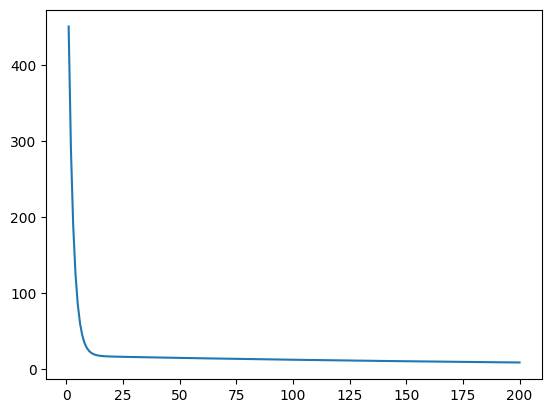

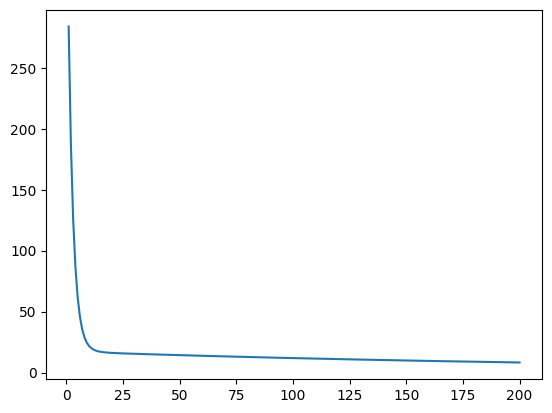

2.99467396736145 1.3145769834518433


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_synthetic_data(n_samples = 1000, x_amplitude = 10, noise_amplitude = 1):
    X = torch.randn(n_samples, 1) * x_amplitude
    noise = torch.randn(n_samples, 1) * noise_amplitude

    y = 4 + 3 * X + noise
    return X, y

X, y = generate_synthetic_data()
print(X.shape, y.shape)

def plot_data(x, y):
    plt.scatter(x, y, alpha = 0.5)
    plt.show()

def plot_loss_history(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.show()

def plot_fitted_line(x, y, y_pred):
    plt.scatter(x, y, alpha = 0.3)
    sorted_line = [(x, y_p) for x, y_p in zip(x, y_pred)]
    sorted_line = sorted(sorted_line, key = lambda x:x[0])
    sorted_x = [e[0] for e in sorted_line]
    sorted_y_pred = [e[1] for e in sorted_line]
    plt.plot(sorted_x, sorted_y_pred, color = 'red')

    plt.show()

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.w = torch.randn(1, 1, requires_grad = True)
        self.b = torch.randn(1, requires_grad = True)
        self.loss = nn.MSELoss()

    def forward(self, X):
        return X @ self.w + self.b

    def train(self, x, y, learning_rate = 0.001, epochs = 20, print_log = True, plot = True):
        # loss_function = nn.MSELoss()
        loss_history = []
        for epoch in range(epochs):
            y_pred = self(x)
            # print(y_pred, y)
            loss = self.loss(y_pred, y)
            loss_history.append(loss.item())

            # compute the gradient of the loss
            loss.backward()

            with torch.no_grad():
                self.w -= learning_rate * self.w.grad
                self.b -= learning_rate * self.b.grad

            self.w.grad.zero_()
            self.b.grad.zero_()

            if print_log:
                print(f'[Linear Regression with torch.tensor] Epoch {epoch+1}/{epochs} Loss: {loss.item()}')
        if plot:
            plot_loss_history(loss_history)
        return loss_history

    def evaluate(self, x, y):
        with torch.no_grad():
            y_pred = model(x)
            return self.loss(y_pred, y).item()

X, y = generate_synthetic_data(noise_amplitude = 1)
test_X, test_y = generate_synthetic_data(noise_amplitude = 1)

model = LinearRegressionModel()
test_loss_history = []
train_loss_history = []

for epoch in range(200):
    train_loss = model.train(X, y, epochs = 1, print_log = False, plot = False)
    train_loss_history.extend(train_loss)
    test_loss_history.append(model.evaluate(test_X, test_y))

plot_loss_history(train_loss_history)
plot_loss_history(test_loss_history)

print(model.w.item(), model.b.item())

Optimizer를 써서 gradient descent를 해보기 (SGD)

torch.Size([1000, 1]) torch.Size([1000, 1])


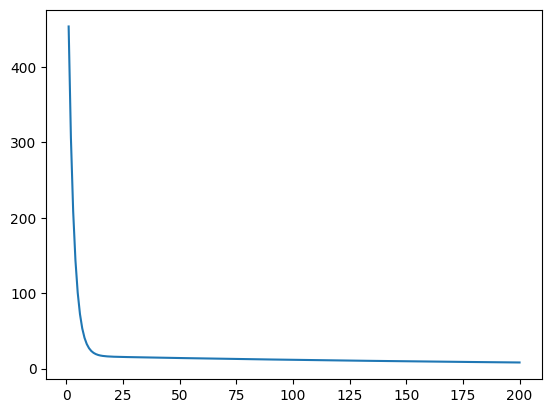

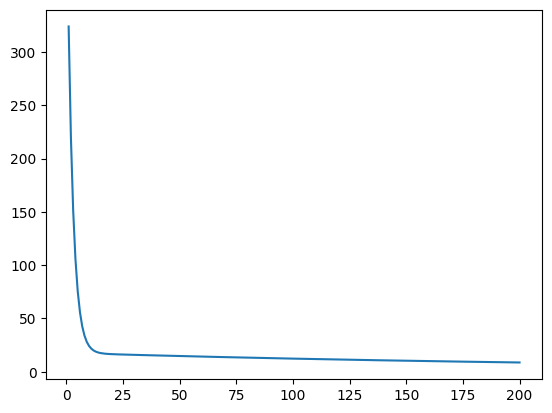

Linear(in_features=1, out_features=1, bias=True)


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_synthetic_data(n_samples = 1000, x_amplitude = 10, noise_amplitude = 1):
    X = torch.randn(n_samples, 1) * x_amplitude
    noise = torch.randn(n_samples, 1) * noise_amplitude

    y = 4 + 3 * X + noise
    return X, y

X, y = generate_synthetic_data()
print(X.shape, y.shape)

def plot_data(x, y):
    plt.scatter(x, y, alpha = 0.5)
    plt.show()

def plot_loss_history(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.show()

def plot_fitted_line(x, y, y_pred):
    plt.scatter(x, y, alpha = 0.3)
    sorted_line = [(x, y_p) for x, y_p in zip(x, y_pred)]
    sorted_line = sorted(sorted_line, key = lambda x:x[0])
    sorted_x = [e[0] for e in sorted_line]
    sorted_y_pred = [e[1] for e in sorted_line]
    plt.plot(sorted_x, sorted_y_pred, color = 'red')

    plt.show()

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # self.w = torch.randn(1, 1, requires_grad = True)
        # self.b = torch.randn(1, requires_grad = True)
        self.layer = nn.Linear(1, 1)
        self.loss = nn.MSELoss()
        self.optimizer = optim.SGD

    def forward(self, X):
        # return X @ self.w + self.b
        return self.layer(X)

    def train(self, x, y, learning_rate = 0.001, epochs = 20, print_log = True, plot = True):
        # loss_function = nn.MSELoss()
        loss_history = []
        optimizer = self.optimizer(self.parameters(), lr = learning_rate)

        for epoch in range(epochs):
            y_pred = self(x)
            # print(y_pred, y)
            loss = self.loss(y_pred, y)
            loss_history.append(loss.item())

            # compute the gradient of the loss
            loss.backward()


            # with torch.no_grad():
            #     # self.w -= learning_rate * self.w.grad
            #     # self.b -= learning_rate * self.b.grad
            #     self.layer.weight -= learning_rate * self.layer.weight.grad
            #     self.layer.bias -= learning_rate * self.layer.bias.grad
            optimizer.step()

            # self.w.grad.zero_()
            # self.b.grad.zero_()
            # self.layer.weight.grad.zero_()
            # self.layer.bias.grad.zero_()
            optimizer.zero_grad()

            if print_log:
                print(f'[Linear Regression with torch.tensor] Epoch {epoch+1}/{epochs} Loss: {loss.item()}')
        if plot:
            plot_loss_history(loss_history)
        return loss_history

    def evaluate(self, x, y):
        with torch.no_grad():
            y_pred = model(x)
            return self.loss(y_pred, y).item()

X, y = generate_synthetic_data(noise_amplitude = 1)
test_X, test_y = generate_synthetic_data(noise_amplitude = 1)

model = LinearRegressionModel()
test_loss_history = []
train_loss_history = []

for epoch in range(200):
    train_loss = model.train(X, y, epochs = 1, print_log = False, plot = False)
    train_loss_history.extend(train_loss)
    test_loss_history.append(model.evaluate(test_X, test_y))

plot_loss_history(train_loss_history)
plot_loss_history(test_loss_history)

print(model.layer)


torch DataLoader 써서 데이터 다루기 (자동으로 알아서 batching 해줌!)

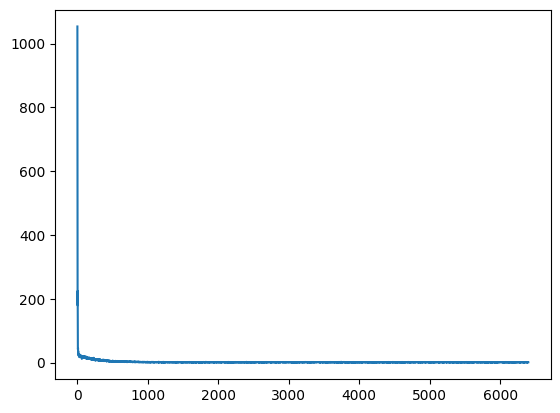

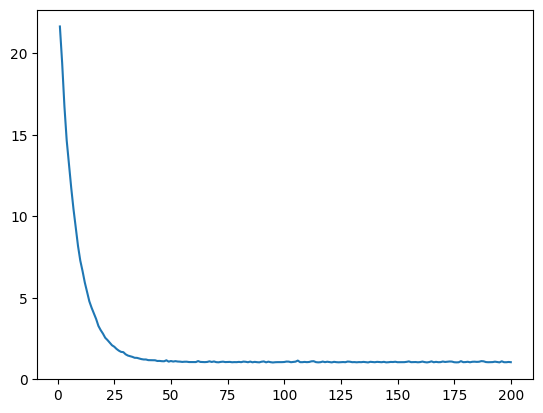

Linear(in_features=1, out_features=1, bias=True)


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_data(x, y):
    plt.scatter(x, y, alpha = 0.5)
    plt.show()
# 손실 이력 시각화
def plot_loss_history(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.show()
# 모델이 예측한 직선과 실제 데이터를 시각화
def plot_fitted_line(x, y, y_pred):
    plt.scatter(x, y, alpha = 0.3) # 실제 데이터 점으로 시각화
    sorted_line = [(x, y_p) for x, y_p in zip(x, y_pred)]
    sorted_line = sorted(sorted_line, key = lambda x:x[0]) # x 값에 따라 정렬
    sorted_x = [e[0] for e in sorted_line]
    sorted_y_pred = [e[1] for e in sorted_line]
    plt.plot(sorted_x, sorted_y_pred, color = 'red') # 예측 직선

    plt.show()
# 합성 데이터를 생성
def generate_synthetic_data(n_samples = 1000, x_amplitude = 10, noise_amplitude = 1, batch_size = 32):
    X = torch.randn(n_samples, 1) * x_amplitude # 랜덤 X 생성
    noise = torch.randn(n_samples, 1) * noise_amplitude # noise 생성

    y = 4 + 3 * X + noise # 선형 관계에 잡음 추가

    dataset = TensorDataset(X, y)
    dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

    return dataloader
# 선형 회귀 모델 클래스
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # self.w = torch.randn(1, 1, requires_grad = True)
        # self.b = torch.randn(1, requires_grad = True)
        self.layer = nn.Linear(1, 1) # 1차원 입력과 1차원 출력을 가지는 선형 레이어
        self.loss = nn.MSELoss() # 손실 함수로 평균 제곱 오차 사용
        self.optimizer = optim.SGD # 확률적 경사 하강법 최적화기 사용

    def forward(self, X):
        # return X @ self.w + self.b
        return self.layer(X) # 입력 X를 통해 예측값 계산
    # 모델 훈련 메소드
    def train(self, data, learning_rate = 0.001, epochs = 20, print_log = True, plot = True):
        # loss_function = nn.MSELoss()
        loss_history = [] # 손실 이력 저장
        optimizer = self.optimizer(self.parameters(), lr = learning_rate) # 최적화기 초기화

        for epoch in range(epochs):
            for x, y in data: # 배치 단위로 데이터 반복
                y_pred = self(x) # 예측값 계산

                loss = self.loss(y_pred, y) # 손실 계산
                loss_history.append(loss.item()) # 손실 이력에 추가

                # compute the gradient of the loss # 손실의 기울기 계산
                loss.backward()
                optimizer.step() # 가중치 업데이트
                optimizer.zero_grad() # 기울기 초기화

            if print_log:
                print(f'[Linear Regression with torch.tensor] Epoch {epoch+1}/{epochs} Loss: {loss.item()}') # 로그 출력
        if plot:
            plot_loss_history(loss_history) # 손실 이력 시각화
        return loss_history
    # 모델 평가 메소드
    def evaluate(self, data):
        with torch.no_grad(): # 평가 중에는 기울기 계산을 하지 않음
            loss_list = []

            for x, y in data: # 데이터 반복
                y_pred = model(x) # 예측값 계산
                loss = self.loss(y_pred, y).item() # 손실 계산
                loss_list.append(loss) # 손실 목록에 추가

            return sum(loss_list) / len(loss_list) # 평균 손실 반환
# 합성 데이터 생성
train_data = generate_synthetic_data(noise_amplitude = 1)
test_data = generate_synthetic_data(noise_amplitude = 1)
# 모델 초기화
model = LinearRegressionModel()
test_loss_history = [] # 테스트 손실 이력 초기화
train_loss_history = [] # 훈련 손실 이력 초기화
# 모델 훈련 및 평가
for epoch in range(200):
    train_loss = model.train(train_data, epochs = 1, print_log = False, plot = False) # 훈련
    train_loss_history.extend(train_loss) # 훈련 손실 이력 저장
    test_loss_history.append(model.evaluate(test_data)) # 테스트 손실 평가
# 손실 이력 시각화
plot_loss_history(train_loss_history)
plot_loss_history(test_loss_history)

print(model.layer) # 최종 모델의 레이어 정보 출력

1. $x+y<1$인지 판별하는
  - 데이터셋을 만들고
  - 뉴럴넷을 자유롭게 여러 형태로 만든 후
  - 학습/평가하고
  - 최종적으로 가장 좋은 뉴럴넷의 성능을 확인해보세요.
2. $x^2+y^2<1$인지 판별하는
  - 데이터셋을 만들고
  - 뉴럴넷을 자유롭게 여러 형태로 만든 후
  - 학습/평가하고
  - 최종적으로 가장 좋은 뉴럴넷의 성능을 확인해보세요.

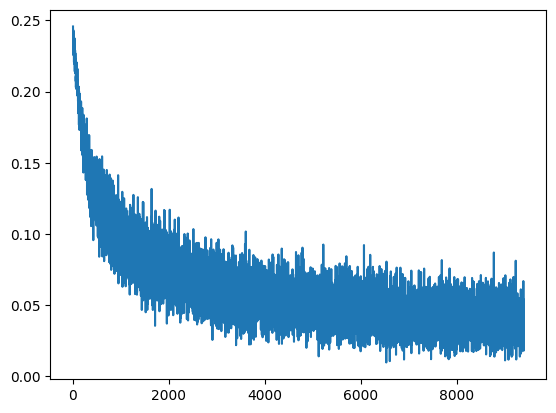

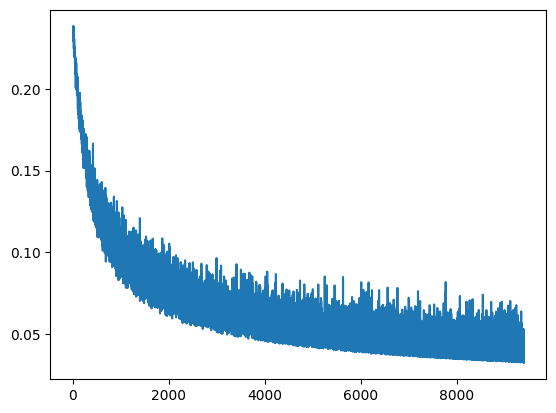

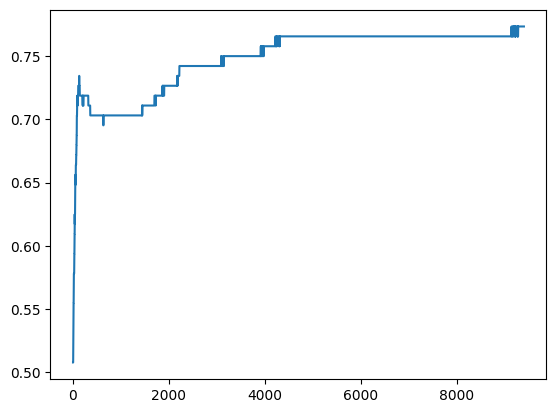

(tensor(0.7656), 0.04828378185629845)

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_data(x, y):
    plt.scatter(x, y, alpha = 0.5)
    plt.show()

def plot_loss_history(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.show()

def generate_artificial_data(n_samples, batch_size = 32):
    x = torch.randn(n_samples, 2)
    y = torch.sum(x**2, dim = 1).unsqueeze(dim = 1)

    y = (y > 1).float()

    dataset = TensorDataset(x, y)
    dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

    return dataloader

class BinaryClassifier(nn.Module):
    def __init__(self, hidden_size):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(2, hidden_size)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        self.loss = nn.MSELoss()
        self.optimizer = optim.SGD

    def forward(self, x):
        output = self.layer1(x) # output.shape: (batch_size, hidden_size)
        output = self.activation(output)
        output = self.layer2(output) # output.shape: (batch_size, 1)
        output = self.sigmoid(output) # output.shape: (batch_size, 1)

        return output

    def train_model(self, train_data, valid_data, epochs = 20, learning_rate = 0.002):
        optimizer = self.optimizer(self.parameters(), lr = learning_rate)
        train_loss_history = []
        valid_loss_history = []
        valid_acc_history = []

        for epoch in range(epochs):
            for x, y in train_data:
                y_pred = model(x)
                loss = self.loss(y, y_pred)
                train_loss_history.append(loss.item())

                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                acc, valid_loss = self.evaluate_model(valid_data)
                self.train()
                valid_acc_history.append(acc)
                valid_loss_history.append(valid_loss)

            # print(f'{epoch+1}/{epochs} Epoch, train loss = {loss}, valid loss = {valid_loss}, acc = {acc}')

        return train_loss_history, valid_loss_history, valid_acc_history

    def evaluate_model(self, data):
        self.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            loss_history = []
            for x, y in data:
                y_pred = self(x)
                loss_history.append(self.loss(y, y_pred).item())
                correct += torch.sum(((y_pred > 0.5).float() == y).float())
                total += 32

            return correct / total, sum(loss_history) / len(loss_history)

model = BinaryClassifier(32) #
train_data = generate_artificial_data(1000)
valid_data = generate_artificial_data(100)
test_data = generate_artificial_data(100)

train_loss_history, valid_loss_history, valid_acc_history = model.train_model(train_data, valid_data, epochs = 100)
plot_loss_history(train_loss_history)
plot_loss_history(valid_loss_history)
plot_loss_history(valid_acc_history)

model.evaluate_model(test_data)

In [ ]:
import torch
import torch.nn as nn  # 신경망 모듈(nn.Module)을 정의하고 사용하는 모듈
import torch.optim as optim  # 옵티마이저(Optimizer) 모듈: 모델의 가중치를 업데이트하는 방법을 제공
from torch.utils.data import DataLoader, TensorDataset  # DataLoader: 데이터를 배치로 묶어주는 유틸리티, TensorDataset: 텐서 데이터를 다루기 쉽게 하는 클래스
import torch.nn.functional as F  # 활성화 함수(ReLU, Softmax 등) 및 손실 함수 등 다양한 함수들 제공
import numpy as np
import matplotlib.pyplot as plt
import random

# 시드를 설정하여 무작위연산(랜덤값, 가중치 초기화)의 결과를 같은결과가 나오도록 고정
# torch.manual_seed(0)
# np.random.seed(0)

# 합성 데이터를 생성
def generate_data(n_samples = 1000, x_amplitude = 1.5, noise_amplitude = 1, batch_size = 32):
    X = torch.randn(n_samples, 1) * x_amplitude # 표준정규분포(평균 0, 표준편차 1)를 따르는 n_samples개의 난수 샘플을 포함하는 1차원텐서 생성 : x_amplitude를 곱하여 표준편차를 x_amplitude배
    noise = torch.randn(n_samples, 1) * noise_amplitude # noise 생성

    y = 3*X + 4 + noise # 생성값 y = 3x + 4 + (노이즈)첨가

    dataset = TensorDataset(X, y) # X,y를 하나의 dataset으로 병합
    dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)
    return dataloader


'''
TensorDataset(*tensors)

torch.utils.data.DataLoader( # dataset을 iterate로 만들어주며, 배치단위로 data를 처리하도록 도움
    dataset,
    batch_size=1, # 한 번에 로드할 데이터 샘플의 수
    shuffle=False, # 매 epoch마다 데이터셋을 랜덤하게 섞을지를 결정하는 Boolean 값 # 모델의 일반화를 도움
    sampler=None, # dataset에서 샘플 선택방법 정의. DataLoader의 기본샘플링방법을 대체 # 특정샘플링전략 필요시 사용자정의 샘플러 사용
    num_workers=0, # data load에 사용할 프로세스 수, 기본값=메인프로세스에서 data load, 로딩속도 증가
    collate_fn=None, # 배치샘플병합방법을 정의. 기본적으로 텐서를 쌓아 배치생성. 커스텀data포멧 필요 시 사용자 정의 함수 제공가능
    pin_memory=False, # data가 CUDA메모리에 고정되어 GPU로의 data전공속도 향상가능, 주로 GPU사용시 설정
    drop_last=False, # 마지막 배치가 batch_size보다 작을 경우 해당 배치를 버릴지 결정하는 Boolean값
    timeout=0, # data load에 걸리는 최대 시간제한(초). 주어진 시간 내 data로드가 안되면 오류를 반환
    worker_init_fn=None, # 각 워커 프로세스가 시작될 때 호출되는 함수. 주로 랜덤시드설정에 사용. 사용자정의초기화함수로 각 워커시드설정가능
    )
'''
    



In [ ]:
'''
    a개의 data를 b배치사이즈만큼 나눠서 학습하는 총횟수가 step 그걸 끝까지 1회 학습한것이 1에폭스
    batch_size 증가시
    - GPU 병렬처리 능력을 최대한 활용하여 각 스텝이서 처리되는 데이터 양이 많아져 훈련속도가 빨라질 수 있음
    - 더 큰 배치는 손실 함수의 변동성을 줄여 훈련이 더 안정적으로 진행됨. 가중치 없데이트가 더 일관되게 이루어짐
    - GPU메모리 사용량이 증가하여, 여유 메모리를 요구
    - 스탭수가 감소하고 훈련단계가 더 적어질 수 있음, 변동성이 줄어들고 다양한 패턴학습기회가 줄어 일반화능력이 떨어져 특정패턴에만 과적합될 수 있음
    batch_size 감소시
    - 스탭이 많아지고, 데이터의 노이즈와 특이점학습기회가 많아져 훈련변동성이 커져, 즉 훈련데이터에 과적합(overfit)될 가능성이 커짐
    '''